# Sesión 03: Detección de anomalías y comportamientos maliciosos.

Instructores:

- Dr. Vitali Herrera Semenets – CENATAV, La Habana, Cuba (vherrera@cenatav.co.cu)
- MSc. Felipe Antonio Trujillo Fernández – IBERO, Ciudad de México, México (felipe.trujillo@ibero.mx)
- MSc. Joshua Ismael Haase Hernández – IBERO, Ciudad de México, México (felipe.trujillo@ibero.mx)
- Dr. Lázaro Bustio Martínez – IBERO, Ciudad de México, México (lazaro.bustio@ibero.mx)

## Introducción

La detección de anomalías y comportamientos maliciosos es un aspecto crucial en la ciberseguridad moderna. En un entorno digital cada vez más complejo y sofisticado, la capacidad de identificar actividades anómalas y potencialmente dañinas es fundamental para proteger la integridad y seguridad de sistemas y redes informáticas. En esta práctica, se explorarán técnicas y algoritmos de Aprendizaje Automático diseñados para detectar y mitigar amenazas cibernéticas, así como para identificar patrones de comportamiento sospechoso que podrían indicar actividades maliciosas.

## Objetivo

Aplicar técnicas y algoritmos de detección de anomalías y comportamientos maliciosos en datos relacionados con la ciberseguridad.

## Desarrollo

Para el desarrollo de esta práctica, se deberán seguir las indicaciones descritas en el documento "Actividad Práctica - Sesión 3.pdf" y desarrollarlas en este notebook.

### Configuraciones del entorno

Para poder trabajar con Python de una manera más asequible y práctica, se usará Jupyter Notebooks de Google Colaboratory (https://colab.research.google.com). Jupyter Notebooks es una herramienta de código abierto que permite crear documentos interactivos con código en vivo, visualizaciones y texto explicativo, ideal para actividades como análisis de datos, investigación académica y desarrollo de software. Sus ventajas incluyen su interactividad, flexibilidad para trabajar con varios lenguajes de programación, integración de documentación y facilidad para la colaboración en proyectos.

#### Instalación de librerías

Adicionalmente se deben instalar algunas librerías para ser usadas en esta prática. Las librerías e instalar son:

- **[Pandas](https://pandas.pydata.org/):** La biblioteca pandas es una herramienta de análisis de datos y manipulación de estructuras en Python que proporciona estructuras de datos flexibles, como DataFrames y Series, diseñadas para trabajar eficientemente con datos tabulares y de series temporales. Ofrece funcionalidades para la carga de datos desde múltiples fuentes, limpieza y transformación de datos, indexación avanzada, agregaciones, operaciones estadísticas y generación de visualizaciones. Su capacidad para manejar grandes volúmenes de datos y su amplia gama de funcionalidades la convierten en una opción preferida en entornos de ciencia de datos, análisis financiero y otras áreas que requieren manipulación y análisis de datos.
- **[PyArrow:](https://arrow.apache.org/docs/python/index.html)** Es una biblioteca de Python desarrollada por Apache Arrow, diseñada para mejorar el intercambio de datos entre diferentes procesos y sistemas. Proporciona un conjunto de herramientas y funcionalidades para la manipulación eficiente de datos en memoria y su intercambio entre diferentes entornos, como Python, R, Java, C++, entre otros. PyArrow se destaca por su capacidad para manejar grandes volúmenes de datos de manera eficiente, su soporte para varios formatos de datos, como Feather y Parquet, y su integración con otras bibliotecas populares de análisis de datos, como pandas y NumPy. En resumen, PyArrow es una herramienta fundamental para mejorar el rendimiento y la interoperabilidad en aplicaciones que involucran el análisis y procesamiento de datos a gran escala.
- **[Scikit-Learn:](https://scikit-learn.org/stable/)** Scikit-learn es una biblioteca de aprendizaje automático de código abierto para Python que ofrece una amplia gama de algoritmos y herramientas para la implementación eficiente de modelos de aprendizaje supervisado y no supervisado. Con una API bien diseñada y optimizada para el rendimiento, scikit-learn permite a los desarrolladores experimentar con algoritmos de aprendizaje automático de manera fácil y eficiente. Su integración con otras bibliotecas de Python como NumPy y Pandas facilita el análisis de datos complejos, mientras que su documentación completa y detallada proporciona recursos exhaustivos para usuarios de todos los niveles de experiencia. En resumen, scikit-learn es una herramienta esencial para aquellos que buscan construir modelos de aprendizaje automático robustos y escalables en Python.
- **[Matplotlib:](https://matplotlib.org/)** Matplotlib es una biblioteca de visualización de datos en Python que permite crear gráficos estáticos, animados e interactivos. Es una herramienta muy versátil y ampliamente utilizada en el ámbito de la ciencia de datos, la ingeniería y la investigación académica para generar gráficos de alta calidad. Matplotlib proporciona una amplia variedad de funciones para crear gráficos de líneas, dispersión, barras, histogramas, gráficos de contorno, entre otros tipos de visualizaciones. Además, ofrece la capacidad de personalizar prácticamente todos los aspectos de un gráfico, desde el color y el estilo de línea hasta los ejes y etiquetas.
- **[Seaborn:](https://seaborn.pydata.org/)** Seaborn es una biblioteca de visualización de datos en Python que se basa en Matplotlib y ofrece una interfaz de alto nivel para crear gráficos estadísticos atractivos y informativos. Con una sintaxis simplificada, Seaborn permite trabajar de manera intuitiva con estructuras de datos de pandas y ofrece una amplia gama de tipos de gráficos, como gráficos de dispersión, histogramas, gráficos de barras y más. Además, proporciona herramientas para personalizar fácilmente el aspecto visual de los gráficos, lo que la convierte en una opción popular para la exploración de datos y el análisis estadístico en Python.

In [1]:
# El comando "%pip install xxxx" se ejecuta en un entorno de Jupyter Notebook y se 
# utiliza para instalar una biblioteca xxxx en ese entorno específico.
%pip install pandas
%pip install pyarrow
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Uso de librerías

In [47]:
# Importaciones de librerías de manipulación de datos
import pandas as pd
import numpy as np

import joblib

# Importaciones de librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importaciones del módulo warnings para manejar advertencias
import warnings
# Desactiva todas las advertencias
warnings.filterwarnings("ignore")

# Importaciones de librerías para el Aprendizaje Automatizado
from sklearn.metrics import confusion_matrix as cm, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Adquisición de datos

De la [web](https://sites.google.com/view/cswia/inicio) del taller, descargar el dataset `conn250k.zip` que contiene registros de conexiones de red, con cada registro identificado por un ID único. Incluye información sobre la duración de la conexión, así como la cantidad de bytes transferidos desde y hacia la fuente y el destino respectivamente. Este conjunto de datos es útil para el análisis de patrones de tráfico de red y la detección de posibles anomalías o comportamientos maliciosos. Las columnas del dataset “conn250k.csv” se describen a continuación:
- ``record_id``: Identificador único para cada registro de conexión
- ``duration``: La duración de la conexión, medida en segundos y redondeada. Por ejemplo, una conexión de 0.17 segundos se registraría como 0 en este campo.
- ``src_bytes``: Número de bytes de datos transferidos desde la fuente hasta el destino; es decir, la cantidad de bytes salientes desde el host.
- ``dst_bytes``: Número de bytes de datos transferidos desde el destino hasta la fuente; es decir, la cantidad de bytes recibidos por el host.

In [3]:
# Ubicación de los datos. En caso de ser otra ubicación diferente, 
# debe actualizarse aquí.
data_path = 'data\\conn250k.csv'

conn_df = pd.read_csv(data_path, sep=',')
conn_df.shape

(256670, 4)

### Análisis Exploratorio de Datos

Para comenzar el análisis exploratorio de datos (EDA), primero se deben normalizar los nombres de las columnas, comenzando por las comillas de los nombres de las columnas y luego se realizarán varias operaciones para comprender mejor los datos.

In [4]:
# Mostrar los nombres de las columnas
print(conn_df.columns)

Index(['record_ID', ' "duration"', ' "src_bytes"', ' "dst_bytes"'], dtype='object')


In [5]:
# Quitar las comillas de los nombres de las columnas
conn_df.columns = conn_df.columns.str.replace(' "', '')
conn_df.columns = conn_df.columns.str.replace('"', '')
conn_df.columns

Index(['record_ID', 'duration', 'src_bytes', 'dst_bytes'], dtype='object')

Se deben entender las estructuras subyacentes de los datos.

**Visualizar las primeras filas del DataFrame:** Este análisis dará una idea rápida de cómo se ven tus datos y qué tipo de información contienen.

In [6]:
print(conn_df.head())

   record_ID  duration  src_bytes  dst_bytes
0          1         0        236       1228
1          2         0        239        486
2          3         0        234       1364
3          4         0        239       1295
4          5         0        181       5450


**Obtener información sobre el DataFrame:** Este análisis mostrará el resumen de información sobre el DataFrame, incluyendo el número de filas y columnas, el tipo de datos de cada columna y la cantidad de valores no nulos.

In [7]:
print(conn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256670 entries, 0 to 256669
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   record_ID  256670 non-null  int64
 1   duration   256670 non-null  int64
 2   src_bytes  256670 non-null  int64
 3   dst_bytes  256670 non-null  int64
dtypes: int64(4)
memory usage: 7.8 MB
None


**Estadísticas descriptivas básicas:** Se puede obtener estadísticas descriptivas básicas sobre las columnas numéricas, como el recuento, la media, la desviación estándar, el mínimo y el máximo.

In [8]:
print(conn_df.describe())

           record_ID       duration      src_bytes     dst_bytes
count  256670.000000  256670.000000  256670.000000  2.566700e+05
mean   128335.500000       0.640936     474.247898  4.473533e+03
std     74094.391134      15.627170    3391.106084  2.080903e+04
min         1.000000       0.000000       0.000000  0.000000e+00
25%     64168.250000       0.000000     217.000000  6.600000e+02
50%    128335.500000       0.000000     249.000000  1.661000e+03
75%    192502.750000       0.000000     306.000000  4.341000e+03
max    256670.000000    3289.000000   54540.000000  7.068759e+06


**Verificar valores nulos:** Se puede verificar si hay valores nulos en tu DataFrame y contarlos por columna.

In [9]:
print(conn_df.isnull().sum())

record_ID    0
duration     0
src_bytes    0
dst_bytes    0
dtype: int64


**Valores únicos en los datos:** Se puede verificar los valores únicos en los datos para entender los patrones que existen.

In [10]:
conn_df.nunique()

record_ID    256670
duration        368
src_bytes       473
dst_bytes     17063
dtype: int64

Del análisis anterior no se puede apreciar si hay hay datos repetidos, pero cuántos? Cómo afecta esto a los análisis siguientes?

In [11]:
conn_df.duplicated().sum()

0

Y resulta que no hay instancias repetidas!! Lo cual no es correcto. Si se analiza más en detalle, existen conexiones repetidas, pero al tener `record_ID` diferente, no se logran apreciar. Se debe indagar un poco más...

In [12]:
# Contar la cantidad de filas duplicadas basadas en 'duration', 'src_bytes', y 'dst_bytes'
duplicados_detallados = conn_df.duplicated(subset=['duration', 'src_bytes', 'dst_bytes']).sum()

# Imprimir la cantidad de filas duplicadas
print("Cantidad de conexiones repetidas basadas en 'duration', 'src_bytes' y 'dst_bytes':", duplicados_detallados)

Cantidad de conexiones repetidas basadas en 'duration', 'src_bytes' y 'dst_bytes': 121275


Lo anterior tendría más sentido y si se representa gráficamente

In [13]:
# Contar la cantidad de filas únicas y duplicadas
filas_unicas = len(conn_df) - duplicados_detallados
filas_repetidas = duplicados_detallados

# Crear datos para el gráfico de barras
categorias = ['Conexiones únicas', 'Conexiones repetidas']
valores = [filas_unicas, filas_repetidas]

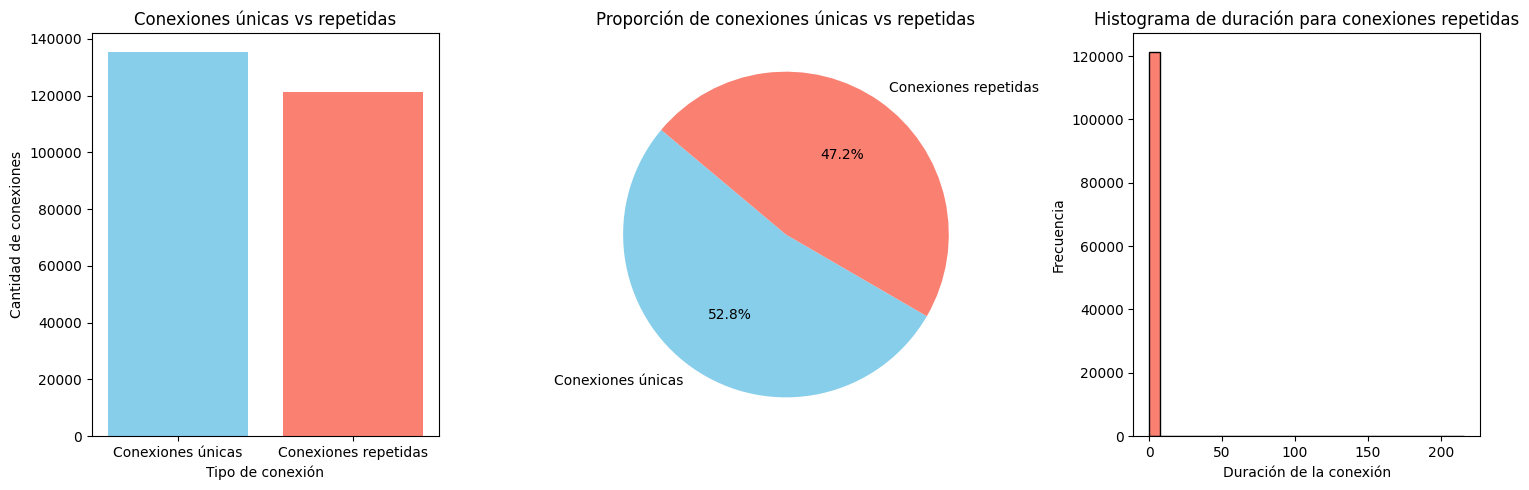

In [14]:
# Crear una figura y subgráficos
plt.figure(figsize=(15, 5))

# Subgráfico 1: Gráfico de barras
plt.subplot(131)
plt.bar(categorias, valores, color=['skyblue', 'salmon'])
plt.xlabel('Tipo de conexión')
plt.ylabel('Cantidad de conexiones')
plt.title('Conexiones únicas vs repetidas')

# Subgráfico 2: Gráfico de pastel
plt.subplot(132)
plt.pie(valores, labels=categorias, colors=['skyblue', 'salmon'], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de conexiones únicas vs repetidas')
plt.axis('equal')  # Hace que el gráfico de pastel se vea como un círculo

# Subgráfico 3: Histograma de duración para conexiones repetidas
plt.subplot(133)
plt.hist(conn_df[conn_df.duplicated(subset=['duration', 'src_bytes', 'dst_bytes'])]['duration'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Duración de la conexión')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración para conexiones repetidas')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Del gráfico anterior se puede ver que las conexiones repetidas son casi de las mismas dimensiones que las conexiones únicas. Lo anterior puede reflejar el hecho de que la mitad de los patrones de conexiones son bastante comunes, las conexiones diferentes son los patrones atípicos que podrían representar acciones maliciosas.

Seguidamente se debe iniciar la búsqueda y exploración de los datos para identificar posibles vulnerabilidades que puedan indicar dónde encontrar valores atípicos en los datos.

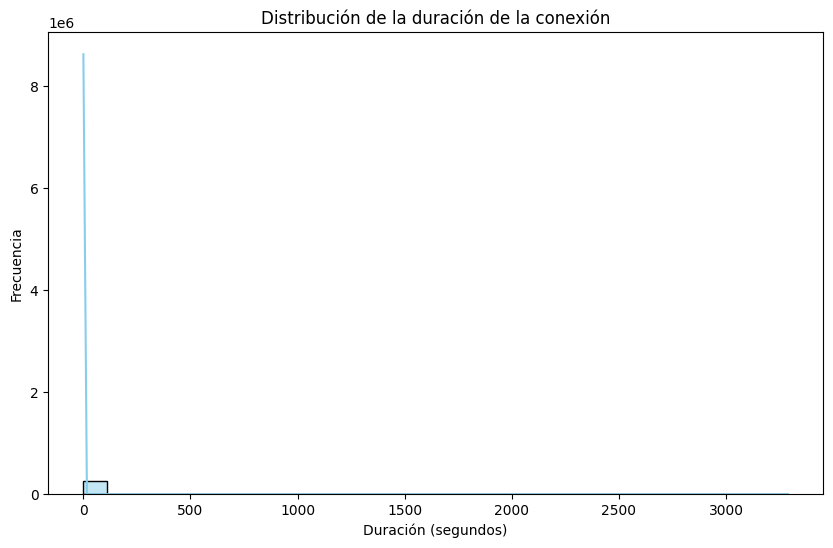

In [15]:
# Visualizar la distribución de la duración de la conexión
plt.figure(figsize=(10, 6))
sns.histplot(conn_df['duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la duración de la conexión')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

Se debe analizar la relación entre las columbas "src_bytes" y "dst_bytes".

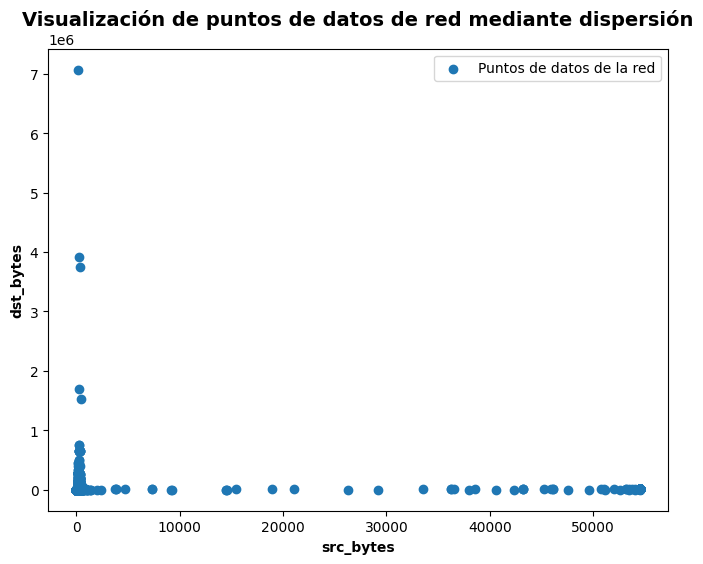

In [16]:
# Visualización adicional proporcionada
plt.figure(figsize=(8, 6))
plt.scatter(conn_df['src_bytes'], conn_df['dst_bytes'], label="Puntos de datos de la red")
plt.legend(loc="best")
plt.ylabel("dst_bytes", fontweight="bold")
plt.xlabel("src_bytes", fontweight="bold")
plt.title('Visualización de puntos de datos de red mediante dispersión', size=14, fontweight="bold")
plt.show()

El gráfico siguiente se realiza para visualizar la relación entre la duración de una conexión y la cantidad de bytes transferidos desde la fuente (``src_bytes``) y hacia el destino (``dst_bytes``). Este tipo de visualización puede ayudar a identificar patrones o tendencias en los datos, así como posibles correlaciones entre las variables. Por ejemplo, se podría observar si hay alguna relación entre la duración de una conexión y la cantidad de bytes transferidos en ambas direcciones, lo que podría ser útil para entender el comportamiento de la red o identificar posibles anomalías.

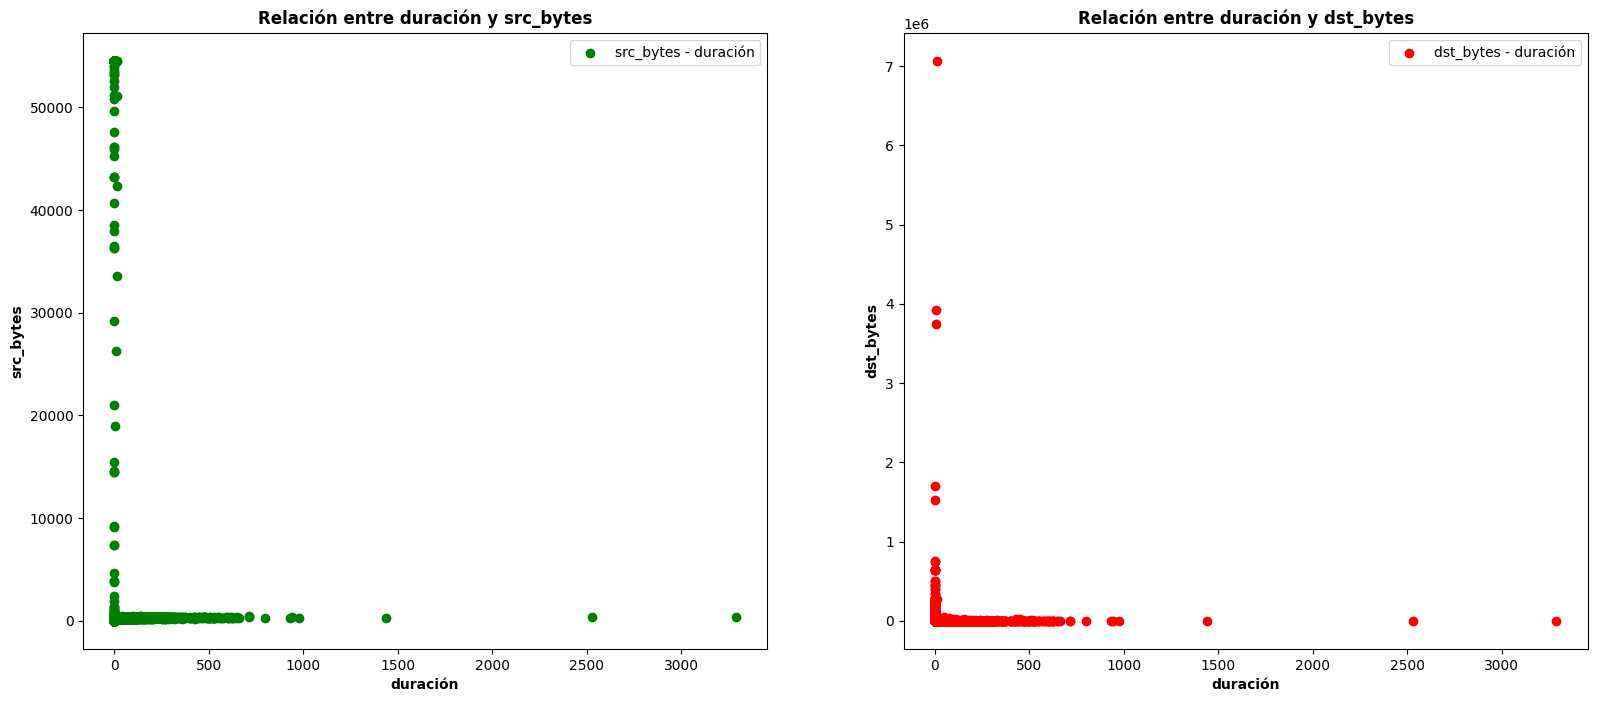

In [17]:
# Configurar el tamaño de la figura
plt.figure(figsize=(30, 8))

# Subgráfico 1: Relación entre 'duration' y 'src_bytes'
plt.subplot(131)  # Configurar la posición del subgráfico en una cuadrícula 1x3
plt.scatter(conn_df['duration'], conn_df['src_bytes'], label="src_bytes - duración", c='g')  # Graficar los datos
plt.legend(loc="best")  # Agregar leyenda
plt.ylabel("src_bytes", fontweight="bold")  # Etiqueta del eje y
plt.xlabel("duración", fontweight="bold")   # Etiqueta del eje x
plt.title('Relación entre duración y src_bytes', fontweight="bold")  # Título del subgráfico

# Subgráfico 2: Relación entre 'duration' y 'dst_bytes'
plt.subplot(132)  # Configurar la posición del subgráfico en una cuadrícula 1x3
plt.scatter(conn_df['duration'], conn_df['dst_bytes'], label="dst_bytes - duración", c='r')  # Graficar los datos
plt.legend(loc="best")  # Agregar leyenda
plt.ylabel("dst_bytes", fontweight="bold")  # Etiqueta del eje y
plt.xlabel("duración", fontweight="bold")   # Etiqueta del eje x
plt.title('Relación entre duración y dst_bytes', fontweight="bold")  # Título del subgráfico

# Mostrar los subgráficos
plt.show()

Conexiones de igual duración describen patrones individuales. Para lograr esto, sería interesante agrupar las conexiones por su duración y ver la relación que hay entre la fuente (`src_bytes`) y el destino (`dst_bytes`). El análisis anterior cobrará más relevancia si se muestra gráficamente.

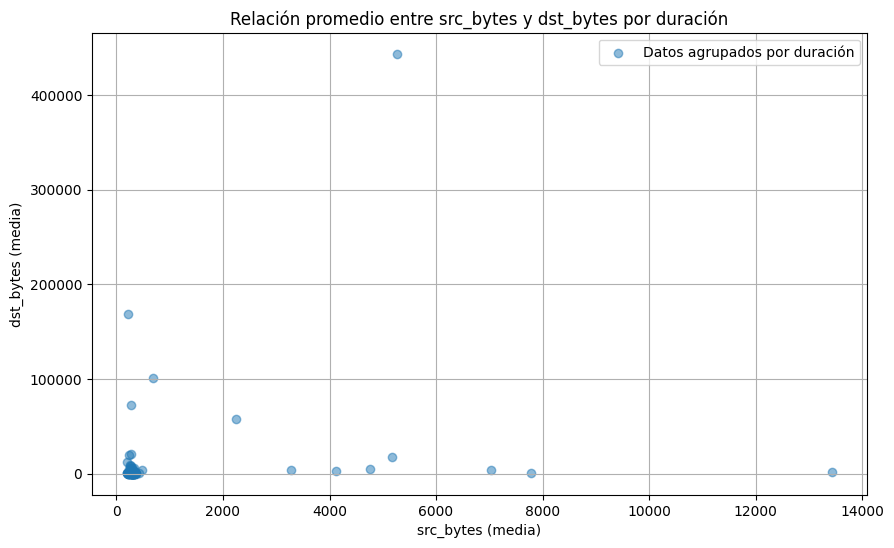

In [18]:
# Crear el gráfico de dispersión
grouped_data = conn_df.groupby('duration').mean()
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['src_bytes'], grouped_data['dst_bytes'], alpha=0.5, label='Datos agrupados por duración')
plt.title('Relación promedio entre src_bytes y dst_bytes por duración')
plt.xlabel('src_bytes (media)')
plt.ylabel('dst_bytes (media)')
plt.grid(True)
plt.legend()  # Agregar la leyenda
plt.show()

A continuación se calculará la duración promedio de las conexiones para cada combinación única de valores de ``src_bytes`` y ``dst_bytes``. Esto podría ser útil para comprender la relación entre la cantidad de bytes transferidos desde la fuente y hacia el destino, y la duración promedio de las conexiones asociadas con esas cantidades de bytes.

In [19]:
conn_df.groupby(["src_bytes", "dst_bytes"])["duration"].mean()

src_bytes  dst_bytes
0          0            0.084615
           17520        0.000000
51         8127         4.500000
137        407          0.000000
138        492          0.000000
                          ...   
54060      7300         0.000000
54540      2920         0.000000
           7300         0.000000
           8314         0.092593
           8315         0.000000
Name: duration, Length: 134353, dtype: float64

Lo anterior tendría más sentido si se representara gráficamente.

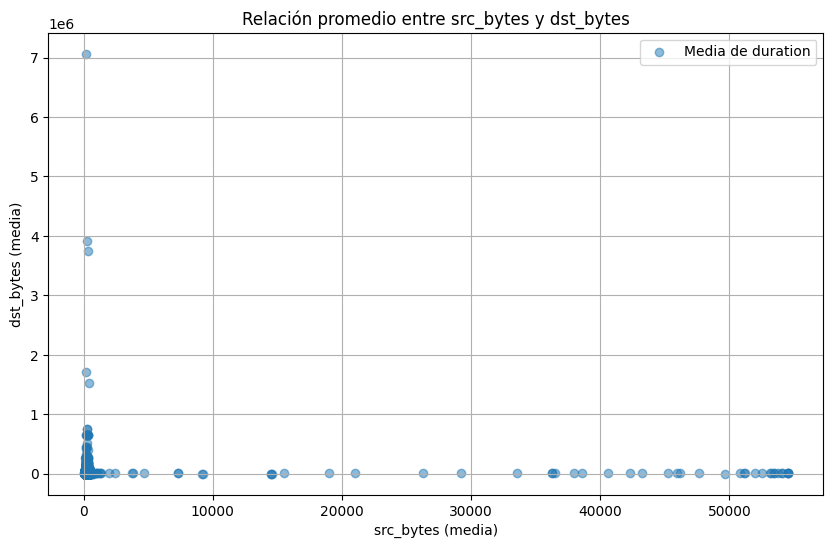

In [20]:
# Agrupar por src_bytes y dst_bytes y calcular la media de duration
grouped_data = conn_df.groupby(["src_bytes", "dst_bytes"]).mean().reset_index()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['src_bytes'], grouped_data['dst_bytes'], alpha=0.5, label='Media de duration')
plt.title('Relación promedio entre src_bytes y dst_bytes')
plt.xlabel('src_bytes (media)')
plt.ylabel('dst_bytes (media)')
plt.grid(True)
plt.legend()  # Agregar la leyenda
plt.show()

A partir de los datos, se puede explorar la correlación entre las variables mediante el uso de un mapa de calor. Este gráfico proporciona una representación visual clara y rápida de las relaciones lineales entre las variables del conjunto de datos. En el mapa de calor, los tonos más intensos indican una correlación más fuerte, ya sea positiva o negativa, mientras que los tonos más suaves indican correlaciones más débiles o cercanas a cero.

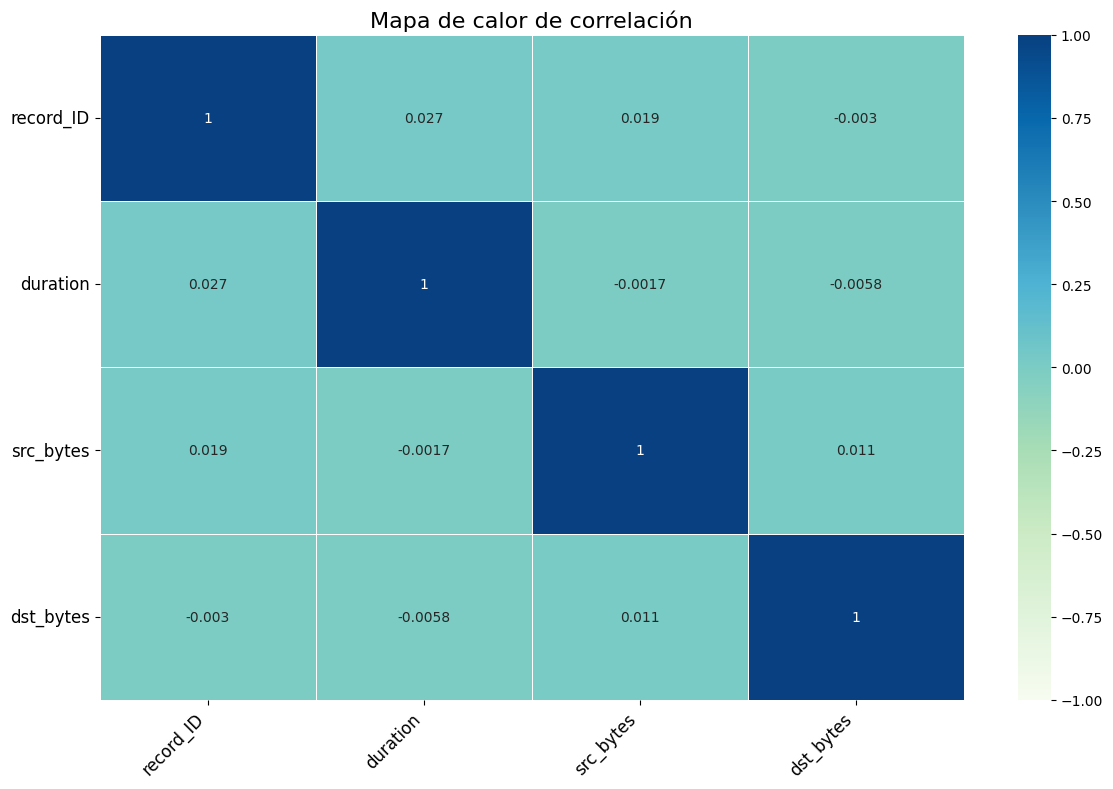

In [21]:
plt.figure(figsize=(12, 8))
mapa_calor = sns.heatmap(conn_df.corr(), vmin=-1, vmax=1, annot=True, cmap="GnBu", linewidths=0.5, annot_kws={"size": 10})
mapa_calor.set_title('Mapa de calor de correlación', fontsize=16)
mapa_calor.set_xticklabels(mapa_calor.get_xticklabels(), rotation=45, ha='right', fontsize=12)
mapa_calor.set_yticklabels(mapa_calor.get_yticklabels(), rotation=0, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

El gráfico anterior representa la matriz de correlación, que muestra las correlaciones entre cuatro variables distintas: ``record_ID``, ``duration``, ``src_bytes`` y ``dst_bytes``. Cada fila y columna de la matriz corresponde a una de estas variables. Del gráfico se puede concluir que:

1. La diagonal principal contiene valores de correlación de 1. Estos valores representan la correlación de cada variable consigo misma, lo que siempre será perfectamente correlacionado y tiene sentido.

2. Los valores fuera de la diagonal principal representan las correlaciones entre pares de variables diferentes. Por ejemplo, el valor en la fila 1 (``record_ID``) y la columna 2 (``duration``) indica la correlación entre `record_ID` y `duration`, y así sucesivamente.

3. Los valores de correlación varían en un rango de -1 a 1. Una correlación de 1 indica una correlación perfecta positiva, lo que significa que las variables aumentan juntas en la misma dirección. Una correlación de -1 indica una correlación perfecta negativa, lo que significa que las variables se mueven en direcciones opuestas. Un valor de correlación cercano a 0 indica una correlación débil o nula entre las variables.

4. Basándose en los valores proporcionados, se puede apreciar que la correlación entre `duration` y `src_bytes` es bastante baja (0.019209), mientras que la correlación entre `src_bytes` y `dst_bytes` es un poco más alta (0.010770). Por otro lado, la correlación entre `record_ID` y las otras variables es muy baja, lo que sugiere que no hay una relación lineal significativa entre `record_ID` y las otras variables.

### Análisis de agrupamiento de datos

A partir de los datos anteriores surge la premisa de que las conexiones similares se diferenciarán mucho de las diferentes, se puede realizar un análisis de agrupamiento de los datos. Esto podría ser medido a partir de la diferencia entre los bytes enviados y recibidos. Para ello se puede determinar la diferencia entre estas variables y a partir de ello, realizar los análisis subsecuentes.

In [22]:
conn_df['diff_bytes'] = conn_df['src_bytes'] - conn_df['dst_bytes']
conn_df

,record_ID,duration,src_bytes,dst_bytes,diff_bytes
0,1,0,236,1228,-992
1,2,0,239,486,-247
2,3,0,234,1364,-1130
3,4,0,239,1295,-1056
4,5,0,181,5450,-5269
...,...,...,...,...,...
256665,256666,0,306,236,70
256666,256667,0,288,4017,-3729
256667,256668,0,289,1096,-807
256668,256669,0,198,2169,-1971


En el contexto de un análisis de conexiones para determinar acciones maliciosas, la columna "diff_bytes", que representa la diferencia entre los bytes enviados y recibidos en una conexión de red, podría tener varias interpretaciones:

1. **Transferencia de datos inusualmente grande o pequeña**: Una diferencia significativa entre los bytes enviados y recibidos podría indicar una transferencia de datos inusual. Por ejemplo, una gran cantidad de datos enviados y pocos recibidos podría ser indicativo de un ataque de denegación de servicio (DDoS), donde un host intenta abrumar a otro con un tráfico excesivo. Por otro lado, una gran cantidad de datos recibidos y pocos enviados podría indicar la descarga de datos o la exfiltración de información desde un host comprometido.

2. **Transferencia desequilibrada**: Una diferencia significativa en los bytes enviados y recibidos también podría indicar un comportamiento anómalo, como una transferencia de datos desequilibrada entre dos hosts. Por ejemplo, una conexión que envía una gran cantidad de datos a un host pero recibe muy pocos datos a cambio podría ser indicativa de una comunicación sospechosa o maliciosa.

3. **Manipulación de protocolos de red**: En algunos casos, una diferencia significativa entre los bytes enviados y recibidos podría ser el resultado de la manipulación maliciosa de los protocolos de red. Por ejemplo, un atacante podría intentar explotar vulnerabilidades en un protocolo para falsificar o manipular los datos de la conexión de red, lo que podría resultar en discrepancias entre los bytes enviados y recibidos.

La columna "diff_bytes" puede proporcionar pistas valiosas para detectar actividades maliciosas o anómalas en una red. Sin embargo, es importante tener en cuenta que estas discrepancias pueden tener explicaciones legítimas en algunos casos, por lo que es crucial realizar un análisis más detallado y considerar otros factores antes de concluir que una conexión es maliciosa.

Se representa la columna ``diff_bytes`` mediante un histograma.

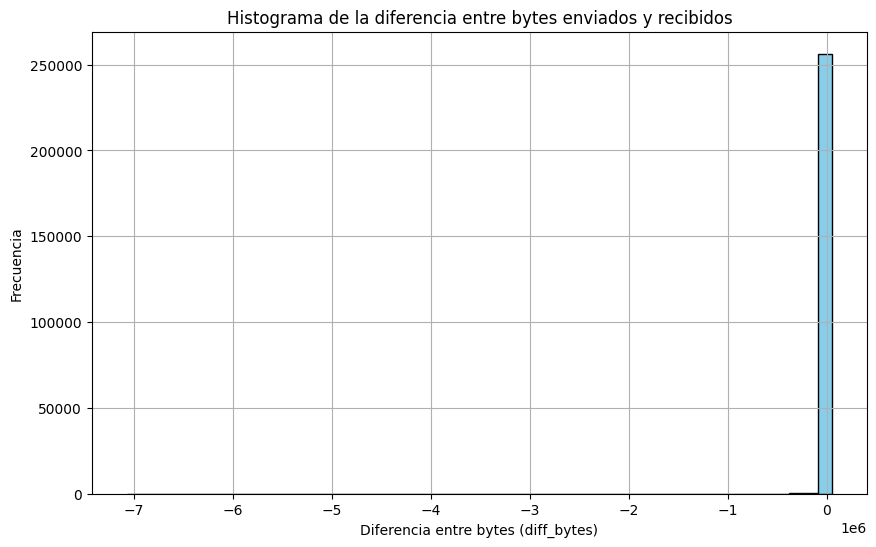

In [23]:
# Crear el histograma de la columna "diff_bytes"
plt.figure(figsize=(10, 6))
plt.hist(conn_df['diff_bytes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de la diferencia entre bytes enviados y recibidos')
plt.xlabel('Diferencia entre bytes (diff_bytes)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Antes de hacer el agrupamiento, se deben normalizar los datos para que las variables con mayores valores no dominen los análisis.

In [24]:
# Preprocesamiento de datos: estandarización
scaler = StandardScaler()
conn_df_scaled = scaler.fit_transform(conn_df)

Seguidamente una duda surge antes de hacer el agrupamiento: cuál será el número óptimo de grupos? La respuesta la da el método del código.

  File "d:\trabajo\Vitali\Taller Ciberseguridad con Inteligencia Artificial\00.-src\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


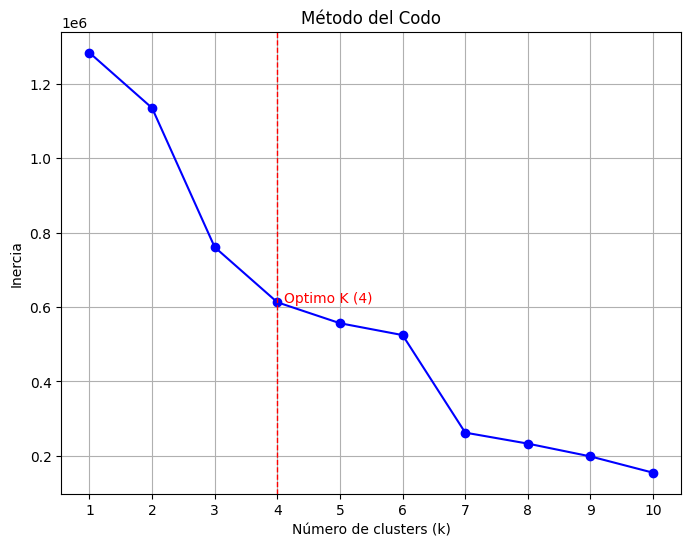

Número óptimo de grupos (clusters): 4


In [25]:
# Lista para almacenar la inercia
inertia = []

# Rango de valores de k a probar
k_range = range(1, 11)

# Calcular la inercia para diferentes valores de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(conn_df_scaled)
    inertia.append(kmeans.inertia_)

# Calcular la segunda derivada de la curva de inercia
second_derivative = np.gradient(np.gradient(inertia))

# Encontrar el punto de inflexión
optimal_k = np.argmax(second_derivative) + 1  # +1 porque el rango comienza desde 1
optimal_inertia = inertia[optimal_k - 1]

# Graficar la inercia en función de k
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)

# Agregar la línea discontinua roja en el punto del número óptimo de grupos
plt.axvline(x=optimal_k, color='r', linestyle='--', linewidth=1)
plt.text(optimal_k + 0.1, optimal_inertia, f'Optimo K ({optimal_k})', color='r')

plt.show()

print("Número óptimo de grupos (clusters):", optimal_k)

Una vez determinado el número óptimo de grupos, se puede utilzar para mostrar los resultados (también se pueden explorar otros números de grupos).

In [26]:
optimal_k = 2

In [27]:
# Aplicar el algoritmo de KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(conn_df_scaled)

# Etiquetas de los clusters asignadas por KMeans
labels = kmeans.labels_

# Agregar las etiquetas de los clusters al DataFrame original
conn_df['cluster'] = labels

# Visualizar los resultados
print(conn_df.head())

   record_ID  duration  src_bytes  dst_bytes  diff_bytes  cluster
0          1         0        236       1228        -992        0
1          2         0        239        486        -247        0
2          3         0        234       1364       -1130        0
3          4         0        239       1295       -1056        0
4          5         0        181       5450       -5269        0


Lo anterior se puede mostrar de manera gráfica. Para esto, se deben reducir dimensiones para que se pueda mostrar en un gráfico en 2D. Se puede experimentar con varios números de grupos para ver los resultados.

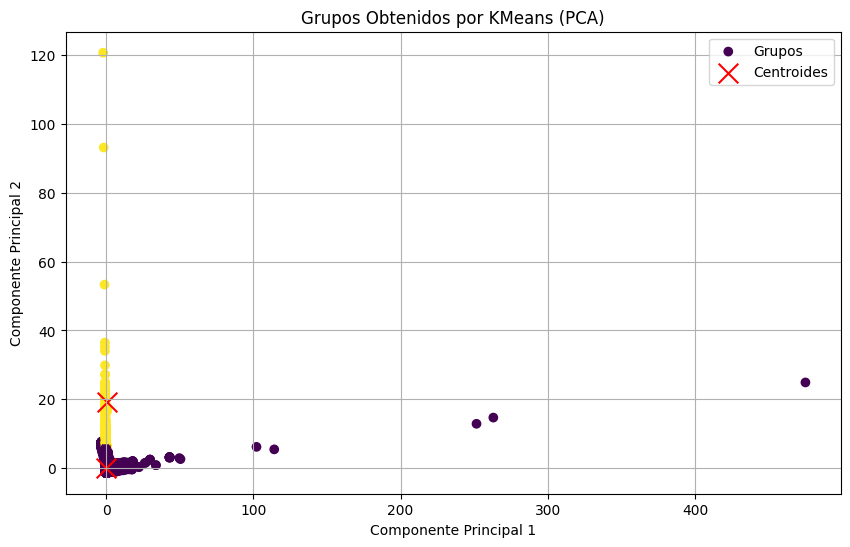

In [28]:
# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones
conn_df_pca = pca.fit_transform(conn_df_scaled)

# Aplicar el algoritmo de KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(conn_df_scaled)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Crear un DataFrame con los resultados de PCA y las etiquetas de los clusters
pca_df = pd.DataFrame(data=conn_df_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_df['Cluster'] = labels

# Mostrar los grupos en un scatter plot con centroides
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Componente Principal 1'], pca_df['Componente Principal 2'], c=pca_df['Cluster'], cmap='viridis', label='Grupos')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', label='Centroides')
plt.title('Grupos Obtenidos por KMeans (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


A partir de los análisis anteriores se deben analizar los grupos obtenidos para entender mejor los patrones.

In [29]:
# Analizar las características de los grupos obtenidos
grouped_stats = conn_df.groupby('cluster').describe()

# Seleccionar solo las estadísticas de interés
selected_stats = grouped_stats.loc[:, (slice(None), ['mean', 'std', 'min', 'max'])]

# Mostrar las estadísticas descriptivas seleccionadas de cada grupo
print("Estadísticas descriptivas seleccionadas de cada grupo:")
print(selected_stats.transpose())

Estadísticas descriptivas seleccionadas de cada grupo:
cluster                     0              1
record_ID  mean  1.282601e+05  176520.099751
           std   7.409801e+04   53183.580928
           min   1.000000e+00     181.000000
           max   2.566700e+05  256004.000000
duration   mean  1.708673e-01     301.049875
           std   3.816980e+00     238.233074
           min   0.000000e+00     151.000000
           max   1.500000e+02    3289.000000
src_bytes  mean  4.745349e+02     290.822943
           std   3.393750e+03      45.443163
           min   0.000000e+00     159.000000
           max   5.454000e+04     416.000000
dst_bytes  mean  4.479704e+03     529.356608
           std   2.082461e+04    1713.862366
           min   0.000000e+00      27.000000
           max   7.068759e+06   20620.000000
diff_bytes mean -4.005169e+03    -238.533666
           std   2.106328e+04    1720.169531
           min  -7.068579e+06  -20346.000000
           max   5.162000e+04     253.000000


A continuación se analizará cada grupo. Se comienza mostrando un histograma de la columna `duration` para cada grupo.

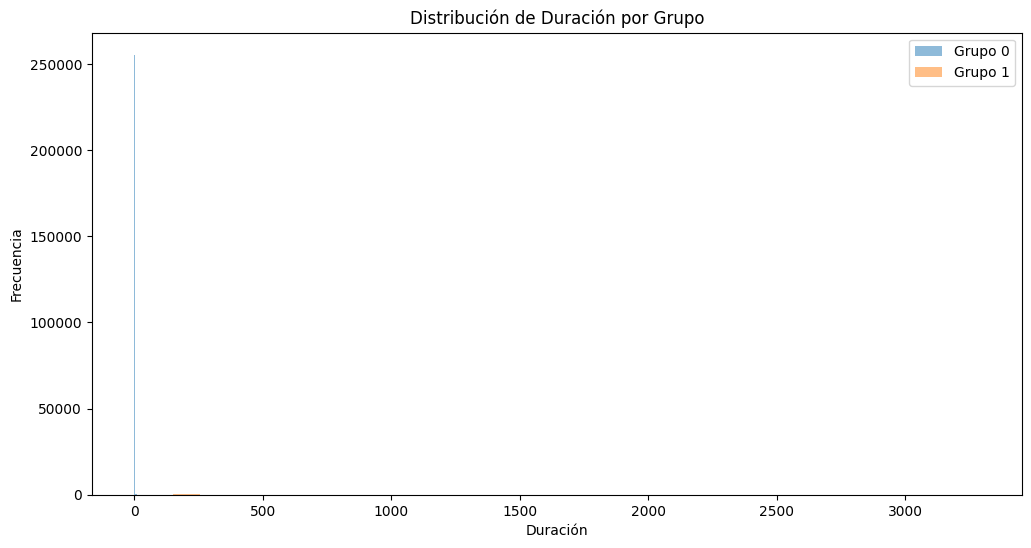

In [30]:
# Histogramas de duración para cada grupo
plt.figure(figsize=(12, 6))
for cluster in grouped_stats.index:
    plt.hist(conn_df[conn_df['cluster'] == cluster]['duration'], bins=30, alpha=0.5, label=f'Grupo {cluster}')
plt.title('Distribución de Duración por Grupo')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

También se puede mostrar la distribución de `src_bytes` mediante un boxplot para cada grupo

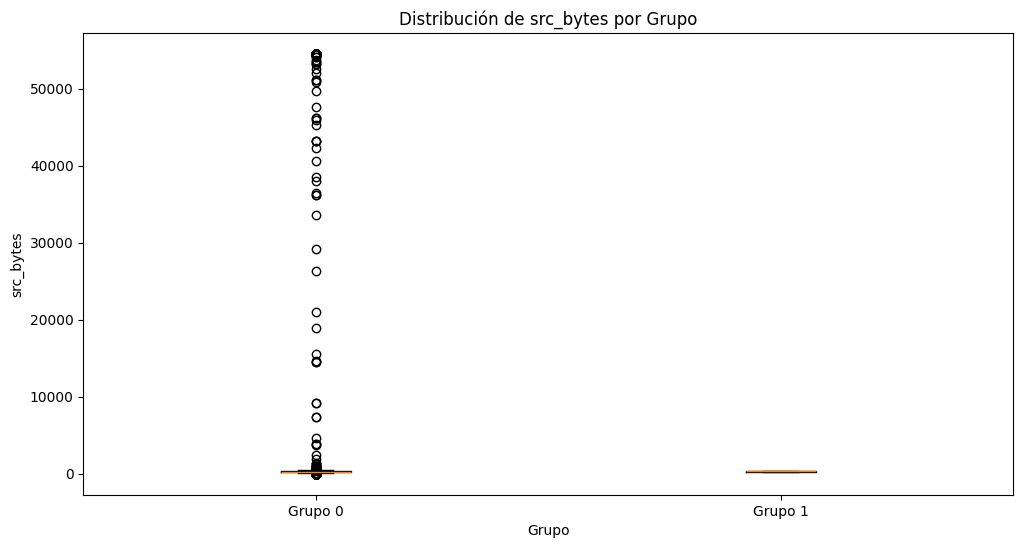

In [31]:
# Boxplots de src_bytes para cada grupo
plt.figure(figsize=(12, 6))
plt.boxplot([conn_df[conn_df['cluster'] == cluster]['src_bytes'] for cluster in grouped_stats.index], labels=[f'Grupo {cluster}' for cluster in grouped_stats.index])
plt.title('Distribución de src_bytes por Grupo')
plt.xlabel('Grupo')
plt.ylabel('src_bytes')
plt.show()

Se muestra la distribución de `dst_bytes` por cada grupo.

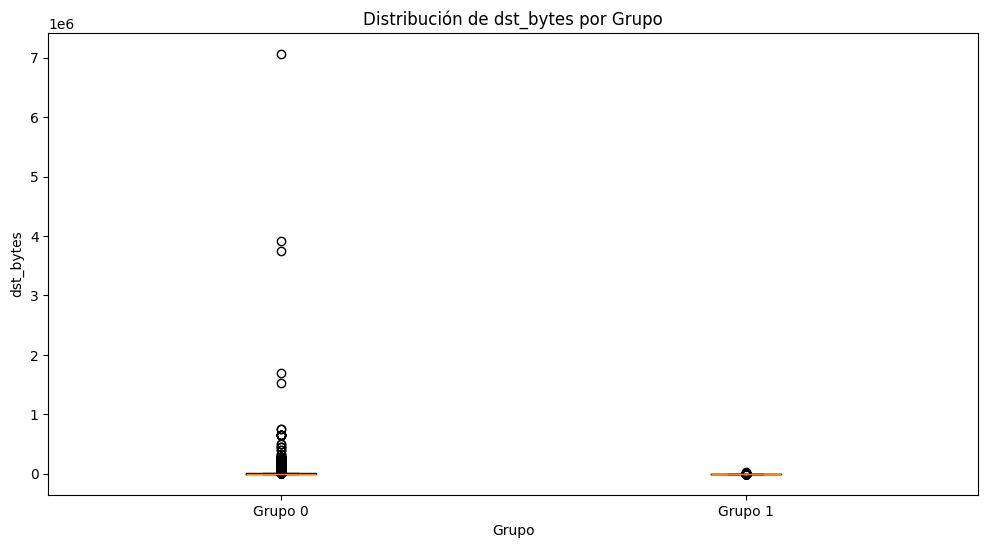

In [32]:
# Boxplots de dst_bytes para cada grupo
plt.figure(figsize=(12, 6))
plt.boxplot([conn_df[conn_df['cluster'] == cluster]['dst_bytes'] for cluster in grouped_stats.index], labels=[f'Grupo {cluster}' for cluster in grouped_stats.index])
plt.title('Distribución de dst_bytes por Grupo')
plt.xlabel('Grupo')
plt.ylabel('dst_bytes')
plt.show()

El dataset ``conn250k_anomaly.csv`` contiene las etiquetas reales para cada transacción en ``conn250k.csv``. Se debe cargar ``conn250k_anomaly.csv`` y compare las etiquetas asignadas (grupos) por el algoritmo de agrupamiento y las etiquetas reales.

In [33]:
# Ubicación de los datos. En caso de ser otra ubicación diferente, 
# debe actualizarse aquí.
data_path = 'data\\conn250k_anomaly.csv'

conn_anom_df = pd.read_csv(data_path, sep=',')
conn_anom_df

,record_id,"""label"""
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
256665,256666,0
256666,256667,0
256667,256668,0
256668,256669,0


En este nuevo dataset, los labels 0 corresponden a conexiones normales, mientras que los 1 corresponden con conexiones atípicas.

Se deben eliminar las `"` de los nombres de las columnas.

In [34]:
# Quitar las comillas de los nombres de las columnas
conn_anom_df.columns = conn_anom_df.columns.str.replace(' "', '')
conn_anom_df.columns = conn_anom_df.columns.str.replace('"', '')
conn_anom_df.columns

Index(['record_id', 'label'], dtype='object')

La columna `record_id` de `conn_anom_df` debe renombrarse a ``record_ID`` para que se pueda utilizar posteriormente.

In [35]:
# Renombrar la columna 'record_id' a 'record_ID' en conn_anomaly_df
conn_anom_df.rename(columns={'record_id': 'record_ID'}, inplace=True)

# Verificar el cambio
print(conn_anom_df.head())


   record_ID  label
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0


Una vez cargados los datos con las etiquetas, estas se deben asignar a los ``conn_df``. Aquí se asignarán de acuerdo con ``record_ID``.

In [36]:
# Agregar la columna "label" a conn_df
conn_df['label'] = None

# Asignar los valores de conn_anomaly_df["label"] a conn_df["label"]
conn_df.loc[conn_df['record_ID'].isin(conn_anom_df['record_ID']), 'label'] = conn_anom_df.loc[conn_anom_df['record_ID'].isin(conn_df['record_ID']), 'label']

# Verificar los primeros registros para confirmar
print(conn_df.head())

   record_ID  duration  src_bytes  dst_bytes  diff_bytes  cluster label
0          1         0        236       1228        -992        0     0
1          2         0        239        486        -247        0     0
2          3         0        234       1364       -1130        0     0
3          4         0        239       1295       -1056        0     0
4          5         0        181       5450       -5269        0     0


In [37]:
conn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256670 entries, 0 to 256669
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   record_ID   256670 non-null  int64 
 1   duration    256670 non-null  int64 
 2   src_bytes   256670 non-null  int64 
 3   dst_bytes   256670 non-null  int64 
 4   diff_bytes  256670 non-null  int64 
 5   cluster     256670 non-null  int32 
 6   label       256670 non-null  object
dtypes: int32(1), int64(5), object(1)
memory usage: 12.7+ MB


La columna `label` es de tipo `object`, por lo que se debe convertir a `int32` para poder hacer los análisis siguientes.

In [38]:
conn_df['label'] = conn_df['label'].astype('int32')
conn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256670 entries, 0 to 256669
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   record_ID   256670 non-null  int64
 1   duration    256670 non-null  int64
 2   src_bytes   256670 non-null  int64
 3   dst_bytes   256670 non-null  int64
 4   diff_bytes  256670 non-null  int64
 5   cluster     256670 non-null  int32
 6   label       256670 non-null  int32
dtypes: int32(2), int64(5)
memory usage: 11.7 MB


Será que esta modificación introdujo valores extraños?

In [39]:
unique_labels = conn_df['label'].unique()
print("Valores únicos en la columna 'label':", unique_labels)

Valores únicos en la columna 'label': [0 1]


Una vez que los datos son correctos, se analiza la precisión de los grupos obtenidos. Para ello se usa la métrica `accuracy_score`, que mide la proporción entre valores de etiquetas reales y valores asignados.

In [40]:
# Comparar las etiquetas asignadas por el algoritmo con las etiquetas reales
precision = accuracy_score(conn_df['label'], conn_df['cluster'])

print("Precisión del agrupamiento:", precision)

Precisión del agrupamiento: 0.9944559161569331


### Clasificación de datos

A partir de las etiquetas reales (`label`), se debe entrenar un modelo de clasificación para aprender las conexiones benignas de las malignas. Para ello se empleará un pipeline que evaluará varios clasificadores y determinará el que mejores resultados alcance de acuerdo a varias metricas, tales como precision, recall, F-Score y AUC-ROC. Para la creación del modelo se dividirá el conjunto `conn_df` en tres grupos:
- Train: se usará para aprender los patrones mediante Aprendizaje Supervisado ya que contiene las etiquetas reales. Contendrá el 70% de los datos de `conn_df` de manera aleatoria.
- Test: se usará para comprobar la eficacia de los modelos creados. Contendrá el 20% de los datos de `conn_df` de manera aleatoria.
- Val: se usará para asignar etiquetas a los datos desconocidos. Contendrá el 10% de los datos de `conn_df` de manera aleatoria.

In [61]:
conn_df

,record_ID,duration,src_bytes,dst_bytes,diff_bytes,cluster,label
0,1,0,236,1228,-992,0,0
1,2,0,239,486,-247,0,0
2,3,0,234,1364,-1130,0,0
3,4,0,239,1295,-1056,0,0
4,5,0,181,5450,-5269,0,0
...,...,...,...,...,...,...,...
256665,256666,0,306,236,70,0,0
256666,256667,0,288,4017,-3729,0,0
256667,256668,0,289,1096,-807,0,0
256668,256669,0,198,2169,-1971,0,0


In [62]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = conn_df[["duration", "src_bytes", "dst_bytes", "diff_bytes"]]
y = conn_df['label']

# Dividir los datos en conjunto de entrenamiento (70%) y conjunto de prueba + validación (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir el conjunto de prueba + validación en conjunto de prueba (20%) y conjunto de validación (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento, prueba y validación
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)
print("Forma de y_val:", y_val.shape)

Forma de X_train: (179669, 4)
Forma de X_test: (51359, 4)
Forma de X_val: (25642, 4)
Forma de y_train: (179669,)
Forma de y_test: (51359,)
Forma de y_val: (25642,)


Una vez obtenido los subconjuntos, entonces se entrenan los modelos de acuerdo con los clasificadores y las métricas predefinidos. Los clasificadores son: `SVM`, `Random Forest` y `KNN`. Puede experimentarse usando otros clasificadores.

El pipeline que se va a utilizar se define a continuación:

In [63]:
# Construir el pipeline con el preprocesamiento y el clasificador
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('classifier', None)  # Seleccionar el clasificador base (por ejemplo, SVM) con probability=True
])

Seguidamente se define la lista de clasificadores a emplear:

In [64]:
# Definir los clasificadores que deseas incluir en el pipeline
classifiers = {
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

Ahora se realiza el entrenamiento de los modelos de `SVM`, `Random Forest` y `KNN`. Para ello se usarán los subconuuntos ``X_train``, `y_train`, `X_test` y `y_test`.

In [65]:
# Realizar la evaluación de modelos con validación cruzada en los conjuntos de entrenamiento y validación
results = {}
for clf_name, clf in classifiers.items():
    pipeline.set_params(classifier=clf)  # Establecer el clasificador en el pipeline
    pipeline.fit(X_train, y_train)  # Entrenar el pipeline en el conjunto de entrenamiento
    y_pred = pipeline.predict(X_val)  # Predecir etiquetas en el conjunto de validación
    precision = precision_score(y_val, y_pred)  # Calcular la precisión
    recall = recall_score(y_val, y_pred)  # Calcular el recall
    f1 = f1_score(y_val, y_pred)  # Calcular el F1-score
    auc_roc = roc_auc_score(y_val, pipeline.predict_proba(X_val)[:, 1])  # Calcular el AUC-ROC
    results[clf_name] = {
        'Precision': precision,
        'Recall': recall,
        'F-Score': f1,
        'AUC-ROC': auc_roc
    }

# Imprimir los resultados
print("Resultados de la evaluación de modelos en el conjunto de validación:")
for clf_name, scores in results.items():
    print(f"Clasificador: {clf_name}")
    print(f"Precisión: {scores['Precision']:.2f}")
    print(f"Recall: {scores['Recall']:.2f}")
    print(f"F-Score: {scores['F-Score']:.2f}")
    print(f"AUC-ROC: {scores['AUC-ROC']:.2f}")
    print("-----------------")
    print()

Resultados de la evaluación de modelos en el conjunto de validación:
Clasificador: SVM
Precisión: 1.00
Recall: 1.00
F-Score: 1.00
AUC-ROC: 1.00
-----------------

Clasificador: Random Forest
Precisión: 1.00
Recall: 1.00
F-Score: 1.00
AUC-ROC: 1.00
-----------------

Clasificador: KNN
Precisión: 1.00
Recall: 1.00
F-Score: 1.00
AUC-ROC: 1.00
-----------------



En este caso ha resultado algo interesante: todos los algoritmos son capaces de detectar el 100% de los datos porque el aprendizaje fue perfecto. Esto, lejos de ser lo óptimo es un error porque estamos ante un caso de "sobreajuste". El sobreajuste, o overfitting en inglés, ocurre cuando un modelo de aprendizaje automático se adapta demasiado bien a los datos de entrenamiento, capturando tanto el patrón real como el ruido en los datos. Como resultado, el modelo puede funcionar excepcionalmente bien en los datos de entrenamiento, pero generalizará mal a nuevos datos no vistos.

En el contexto de la detección de anomalías, si todos los algoritmos muestran una precisión del 100% en la detección de anomalías, podría indicar que los modelos están sobreajustados a los datos de entrenamiento. Esto significa que los modelos han memorizado el conjunto de datos de entrenamiento en lugar de aprender patrones generales que se pueden aplicar a nuevos datos. Como resultado, los modelos pueden no ser capaces de detectar de manera efectiva anomalías en datos desconocidos, lo que reduce su utilidad en la práctica.

Para evitar el sobreajuste, es importante utilizar técnicas como la validación cruzada, ajustar los hiperparámetros del modelo, recopilar más datos de entrenamiento o incluso considerar el uso de modelos más simples que sean menos propensos al sobreajuste. Además, es fundamental evaluar el rendimiento del modelo en un conjunto de datos de prueba independiente para verificar su capacidad para generalizar a nuevos datos.

Ahora se incluye en el pipeline anterior un paso de validación cruzada para eliminar el sobreajuste encontrado en el caso anterior. Para ello se usará la validación cruzada estratificada:

- `StratifiedKFold`: Es una clase de Scikit-learn que implementa la técnica de validación cruzada k-fold estratificada. Esta técnica es similar a la validación cruzada k-fold estándar, pero garantiza que cada pliegue (fold) tenga aproximadamente la misma proporción de muestras de cada clase que el conjunto de datos original. Esto es útil en problemas de clasificación, especialmente cuando hay clases desbalanceadas en el conjunto de datos. La validación cruzada estratificada es importante para asegurar que el modelo se evalúe de manera imparcial en todos los pliegues, lo que puede ayudar a obtener estimaciones de rendimiento más precisas.

- `n_splits=10`: Esto especifica el número de pliegues (folds) en los que se dividirá el conjunto de datos durante la validación cruzada. En este caso, se dividen los datos en 10 pliegues. Cada pliegue se utilizará como conjunto de prueba exactamente una vez, y los restantes pliegues se utilizarán como conjunto de entrenamiento.

- `shuffle=True`: Esta opción indica si se deben barajar aleatoriamente los datos antes de dividirlos en pliegues. Barajar los datos aleatoriamente puede ser útil para evitar sesgos en el orden de los datos originales, lo que puede mejorar la generalización del modelo.

- `random_state=42`: Esto establece una semilla aleatoria para garantizar que los resultados sean reproducibles. Al fijar la semilla aleatoria en un valor específico (en este caso, 42), se garantiza que la división de los datos en pliegues sea consistente cada vez que se ejecute el código, lo que facilita la reproducibilidad de los resultados.


In [67]:
# Definir los clasificadores que deseas incluir en el pipeline
classifiers = {
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Definir el esquema de validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Construir el pipeline con el preprocesamiento y los clasificadores
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar las características
    ('classifier', None)  # Clasificador a seleccionar dinámicamente
])

# Inicializar diccionario para almacenar los resultados y los modelos entrenados
results = {clf_name: {'precision': [], 'recall': [], 'f1': [], 'roc_auc': [], 'model': None} for clf_name in classifiers}

# Realizar la evaluación de modelos con validación cruzada en los conjuntos de entrenamiento y validación
for clf_name, clf in classifiers.items():
    print(f"Entrenando el modelo de {clf_name}...")
    pipeline.set_params(classifier=clf)  # Establecer el clasificador en el pipeline
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=['precision', 'recall', 'f1', 'roc_auc'])
    # Almacenar los resultados de la validación cruzada
    results[clf_name]['precision'].extend(cv_results['test_precision'])
    results[clf_name]['recall'].extend(cv_results['test_recall'])
    results[clf_name]['f1'].extend(cv_results['test_f1'])
    results[clf_name]['roc_auc'].extend(cv_results['test_roc_auc'])
    # Guardar el modelo entrenado
    pipeline.fit(X_train, y_train)
    results[clf_name]['model'] = pipeline
    # Guardar el modelo entrenado en un archivo
    joblib.dump(pipeline, f"{clf_name}_model.pkl")

# Imprimir los resultados promedio de validación cruzada para cada clasificador
print("Resultados de la evaluación de modelos con validación cruzada:")
for clf_name, clf_results in results.items():
    print(f"Clasificador: {clf_name}")
    print("Precisión:", sum(clf_results['precision']) / len(clf_results['precision']))
    print("Recall:", sum(clf_results['recall']) / len(clf_results['recall']))
    print("F-Score:", sum(clf_results['f1']) / len(clf_results['f1']))
    print("AUC-ROC:", sum(clf_results['roc_auc']) / len(clf_results['roc_auc']))
    print("-----------------")
    print()

Entrenando el modelo de SVM...
Entrenando el modelo de Random Forest...
Entrenando el modelo de KNN...
Resultados de la evaluación de modelos con validación cruzada:
Clasificador: SVM
Precisión: 1.0
Recall: 0.992897384305835
F-Score: 0.9964128604609375
AUC-ROC: 0.997539883939124
-----------------

Clasificador: Random Forest
Precisión: 1.0
Recall: 0.992897384305835
F-Score: 0.9964128604609375
AUC-ROC: 0.9992951776371235
-----------------

Clasificador: KNN
Precisión: 0.9986111111111111
Recall: 0.992897384305835
F-Score: 0.9957135597616368
AUC-ROC: 0.9971524790225483
-----------------



A continuación se muestran los resultados obtenidos mediante gráficos para mejorar su entendimiento.

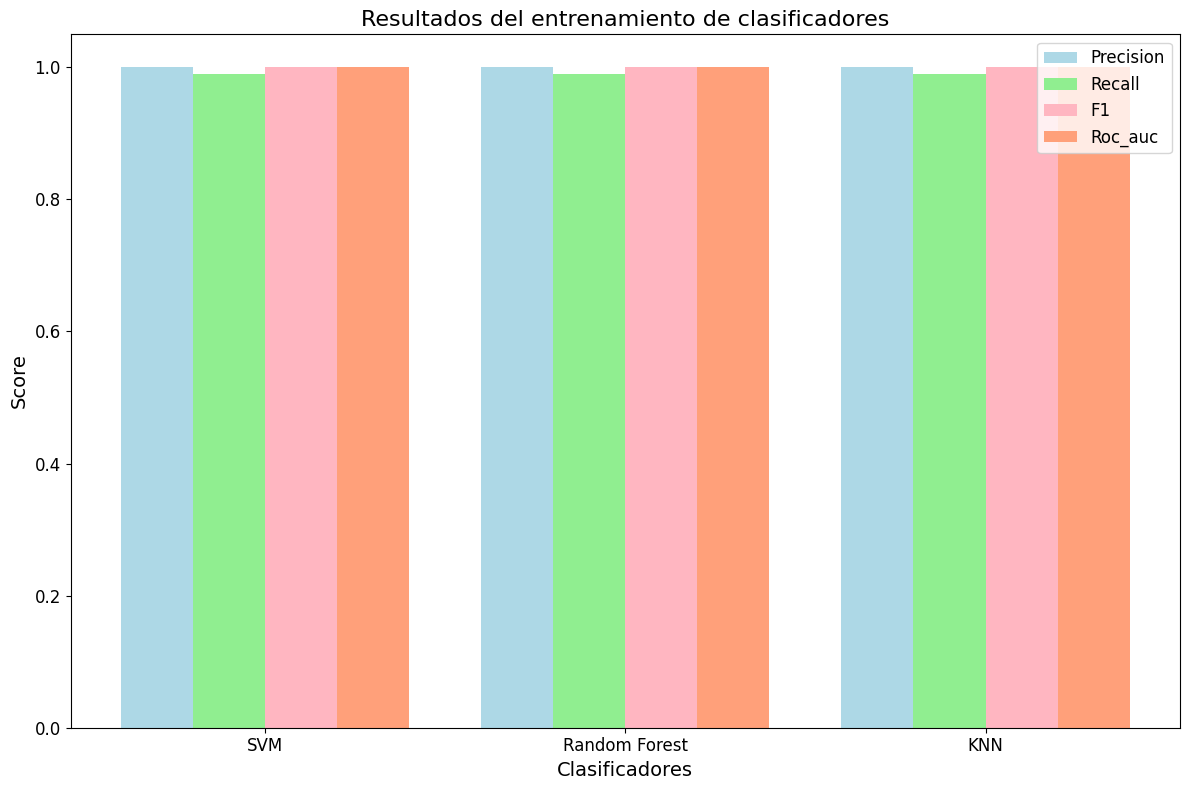

In [68]:
# Definir los nombres de los clasificadores y las métricas
classifier_names = list(results.keys())
metrics = ['precision', 'recall', 'f1', 'roc_auc']

# Inicializar una matriz para almacenar los resultados promedio de cada métrica para cada clasificador
mean_results = np.zeros((len(classifier_names), len(metrics)))

# Calcular los resultados promedio de cada métrica para cada clasificador
for i, clf_name in enumerate(classifier_names):
    for j, metric in enumerate(metrics):
        mean_results[i, j] = np.mean(results[clf_name][metric])

# Definir colores suaves para cada métrica
palette = ['lightblue', 'lightgreen', 'lightpink', 'lightsalmon']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(classifier_names)) * (len(metrics) + 1) * bar_width

for j, metric in enumerate(metrics):
    plt.bar(index + j * bar_width, np.round(mean_results[:, j], 2), bar_width, label=metric.capitalize(), color=palette[j])

# Personalizar el gráfico
plt.xlabel('Clasificadores', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Resultados del entrenamiento de clasificadores', fontsize=16)
plt.xticks(index + 1.5 * bar_width, classifier_names, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Ahora se debe seleccionar al clasificador que mejor desempeño muestra. Para ello, se selecciona de acuerdo a alguna de las métricas que antes se definieron. En este caso se usará `AUC-ROC`.

El AUC-ROC (Área bajo la curva de características operativas del receptor) es una métrica de evaluación comúnmente utilizada en problemas de clasificación binaria para medir el rendimiento de un modelo de clasificación. 

La curva ROC (Receiver Operating Characteristic) es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a medida que se varía el umbral de decisión del clasificador. El área bajo esta curva (AUC) proporciona una medida agregada del rendimiento del modelo en todas las posibles tasas de verdaderos positivos y falsos positivos.

En resumen, el AUC-ROC es una medida de la capacidad de discriminación del modelo, donde un valor más cercano a 1 indica un mejor rendimiento del modelo en términos de separación entre las clases positiva y negativa. Un valor de 0.5 indica que el modelo no tiene capacidad de discriminación (clasificación aleatoria), mientras que un valor inferior a 0.5 indica un rendimiento peor que el azar.

In [69]:
# Seleccionar la métrica
selected_metric = 'roc_auc'  # Puedes cambiar esta métrica según tus necesidades

# Calcular el promedio de la métrica seleccionada para cada clasificador
metric_mean = {clf_name: sum(clf_results[selected_metric]) / len(clf_results[selected_metric]) for clf_name, clf_results in results.items()}

# Encontrar el clasificador con el máximo promedio de la métrica seleccionada
best_classifier_name = max(metric_mean, key=metric_mean.get)
best_classifier_metrics = results[best_classifier_name]

# Imprimir el nombre del mejor clasificador y sus métricas asociadas
print(f"El mejor clasificador para la métrica '{selected_metric}' es: {best_classifier_name}")
print("Métricas del mejor clasificador:")
print(f"Precisión: {sum(best_classifier_metrics['precision']) / len(best_classifier_metrics['precision'])}")
print(f"Recall: {sum(best_classifier_metrics['recall']) / len(best_classifier_metrics['recall'])}")
print(f"F1-Score: {sum(best_classifier_metrics['f1']) / len(best_classifier_metrics['f1'])}")
print(f"AUC-ROC: {sum(best_classifier_metrics['roc_auc']) / len(best_classifier_metrics['roc_auc'])}")


El mejor clasificador para la métrica 'roc_auc' es: Random Forest
Métricas del mejor clasificador:
Precisión: 1.0
Recall: 0.992897384305835
F1-Score: 0.9964128604609375
AUC-ROC: 0.9992951776371235


Una vez obtenido el mejor clasificador, se evaluará con él un grupo de conexiones desconocidas, para determinar si son benignas o malignas.

In [70]:
# Importar el mejor clasificador
best_classifier = None

# Encontrar el clasificador en la lista classifiers que coincide con el mejor clasificador
for clf_name, clf in classifiers.items():
    if clf_name == best_classifier_name:
        best_classifier = clf
        break

if best_classifier is None:
    raise ValueError("No se encontró el mejor clasificador en la lista classifiers")

# Predecir las etiquetas para los datos desconocidos en X_val
y_pred_val = best_classifier.predict(X_val)

# Convertir y_val a un DataFrame de pandas y asignar nombres de columna adecuados
y_val_df = pd.DataFrame(y_val, columns=['label'])

# Agregar las etiquetas predichas a y_val_df en una nueva columna llamada "assigned_labels"
y_val_df['assigned_labels'] = y_pred_val

# Guardar el modelo entrenado en un archivo
joblib.dump(best_classifier, "best_classifier_model.pkl")

y_val_df

,label,assigned_labels
196418,0,1
49148,0,1
124012,0,1
59296,0,1
145603,0,1
...,...,...
167898,0,1
140477,0,1
64722,0,1
214544,0,1
